In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
per = lambda x: x / 15000 * 100

# Обработка данных

In [2]:
data = pd.read_csv("tinkoff_legal_entities_new.csv")

In [4]:
data.sample(5)

,id,date,phones_num,phb_fraud,phb_dirty,phb_all_bad,phb_all,phb_bad_perc,found_phones,phb_fraud_dir,...,defendant_case_perc,rating_ya,ratings_cnt_ya,reviews_cnt_ya,rating_yell,reviews_cnt_yell,rating_2gis,reviews_cnt_2gis,rating_avito,reviews_cnt_avito
1945,a0276103395a,2022-05-30 00:00:00,5,0.0,2.0,2.0,3890.0,0.05,5.0,0.0,...,NaN,0.0,159.0,62.0,4.0,0.0,1.175,21.0,NaN,NaN
6752,a025509806148a,2022-10-04 00:00:00,1,13.0,0.0,13.0,2507.0,0.52,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6821,a5406604387a,2022-08-26 00:00:00,1,2.0,0.0,2.0,423.0,0.47,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10409,a263501061109a,2022-10-27 00:00:00,1,0.0,0.0,0.0,649.0,0.00,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6764,a732894448903a,2022-01-21 00:00:00,3,0.0,0.0,0.0,174.0,0.00,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.shape

(15000, 35)

## работа с NaN

In [60]:
data.isna().sum() / data.shape[0] * 100

id                          0.0
date                        0.0
phones_num                  0.0
phb_fraud                   0.0
phb_dirty                   0.0
phb_all_bad                 0.0
phb_all                     0.0
phb_bad_perc                0.0
found_phones                0.0
phb_fraud_dir               0.0
phb_dirty_dir               0.0
phb_all_bad_dir             0.0
phb_all_dir                 0.0
phb_bad_perc_dir            0.0
found_phones_dir            0.0
claims_percent              0.0
claims_num                  0.0
appl_num                    0.0
complaints_num              0.0
complaints_num_dir          0.0
mvd_request_num             0.0
bad_rep_tcb                 0.0
total_case_cnt              0.0
total_defendant_case_cnt    0.0
total_defendant_case_amt    0.0
defendant_case_perc         0.0
rating_ya                   0.0
ratings_cnt_ya              0.0
reviews_cnt_ya              0.0
rating_yell                 0.0
reviews_cnt_yell            0.0
rating_2

<AxesSubplot:>

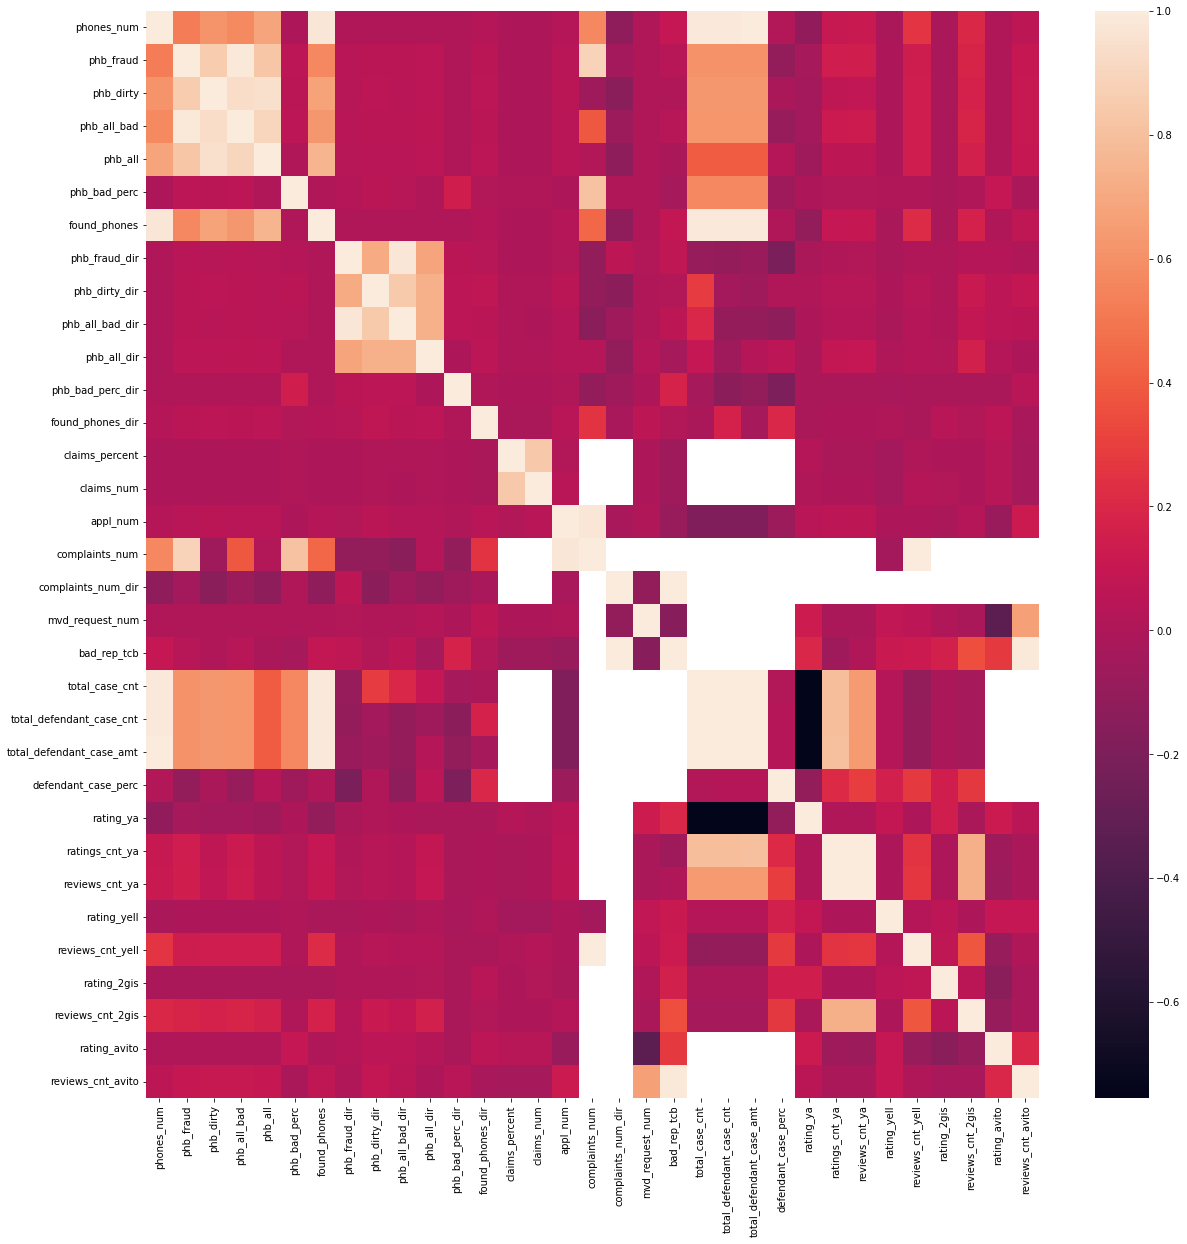

In [7]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr())

In [8]:
data.columns

Index(['id', 'date', 'phones_num', 'phb_fraud', 'phb_dirty', 'phb_all_bad',
       'phb_all', 'phb_bad_perc', 'found_phones', 'phb_fraud_dir',
       'phb_dirty_dir', 'phb_all_bad_dir', 'phb_all_dir', 'phb_bad_perc_dir',
       'found_phones_dir', 'claims_percent', 'claims_num', 'appl_num',
       'complaints_num', 'complaints_num_dir', 'mvd_request_num',
       'bad_rep_tcb', 'total_case_cnt', 'total_defendant_case_cnt',
       'total_defendant_case_amt', 'defendant_case_perc', 'rating_ya',
       'ratings_cnt_ya', 'reviews_cnt_ya', 'rating_yell', 'reviews_cnt_yell',
       'rating_2gis', 'reviews_cnt_2gis', 'rating_avito', 'reviews_cnt_avito'],
      dtype='object')

In [9]:
data.phb_bad_perc_dir.isna().sum()

1231

In [10]:
data.phb_all_dir.isna().sum()

1231

In [11]:
data.phones_num.isna().sum()

0

In [12]:
data.claims_percent.value_counts()

0.00      9818
50.00       25
33.33       19
40.00        7
66.67        7
100.00       4
60.00        3
25.00        3
58.33        1
57.14        1
63.64        1
75.00        1
42.86        1
85.71        1
70.00        1
14.29        1
7.14         1
20.00        1
62.50        1
71.43        1
Name: claims_percent, dtype: int64

In [13]:
rating_columns = [
    "rating_ya",
    "rating_yell",
    "rating_avito",
    "rating_2gis",
    "ratings_cnt_ya"
]

reviews_count_columns = [
    "reviews_cnt_ya",
    "reviews_cnt_yell",
    "reviews_cnt_2gis",
    "reviews_cnt_avito"
]

phones = [
    "phb_bad_perc_dir",
    "phb_all_dir", # !
    "phb_all_bad_dir", # !
    "phb_dirty_dir",
    "phb_fraud_dir",
    "phb_bad_perc",
    "found_phones_dir",
    "phb_all",
    "phb_all_bad",
    "phb_dirty",
    "phb_fraud",
    "found_phones",
    "phones_num"

]

bank_and_police = [
    "total_defendant_case_amt",
    "defendant_case_perc",
    "total_defendant_case_cnt",
    "total_case_cnt",
    "mvd_request_num",
    "complaints_num_dir",
    "complaints_num",
    "claims_percent",
    "appl_num",
    "bad_rep_tcb"
]

data_without_description = [
    "claims_num",
]

In [14]:
data[rating_columns] = data[rating_columns].fillna(-1)

In [15]:
data[reviews_count_columns] = data[reviews_count_columns].fillna(0)

In [16]:
data[phones] = data[phones].fillna(0)

In [17]:
data[bank_and_police] = data[bank_and_police].fillna(0)

In [18]:
data.isna().sum()

id                             0
date                           0
phones_num                     0
phb_fraud                      0
phb_dirty                      0
phb_all_bad                    0
phb_all                        0
phb_bad_perc                   0
found_phones                   0
phb_fraud_dir                  0
phb_dirty_dir                  0
phb_all_bad_dir                0
phb_all_dir                    0
phb_bad_perc_dir               0
found_phones_dir               0
claims_percent                 0
claims_num                  5102
appl_num                       0
complaints_num                 0
complaints_num_dir             0
mvd_request_num                0
bad_rep_tcb                    0
total_case_cnt                 0
total_defendant_case_cnt       0
total_defendant_case_amt       0
defendant_case_perc            0
rating_ya                      0
ratings_cnt_ya                 0
reviews_cnt_ya                 0
rating_yell                    0
reviews_cn

In [19]:
data[data_without_description] = data[data_without_description].fillna(0)

In [20]:
data.isna().sum()

id                          0
date                        0
phones_num                  0
phb_fraud                   0
phb_dirty                   0
phb_all_bad                 0
phb_all                     0
phb_bad_perc                0
found_phones                0
phb_fraud_dir               0
phb_dirty_dir               0
phb_all_bad_dir             0
phb_all_dir                 0
phb_bad_perc_dir            0
found_phones_dir            0
claims_percent              0
claims_num                  0
appl_num                    0
complaints_num              0
complaints_num_dir          0
mvd_request_num             0
bad_rep_tcb                 0
total_case_cnt              0
total_defendant_case_cnt    0
total_defendant_case_amt    0
defendant_case_perc         0
rating_ya                   0
ratings_cnt_ya              0
reviews_cnt_ya              0
rating_yell                 0
reviews_cnt_yell            0
rating_2gis                 0
reviews_cnt_2gis            0
rating_avi

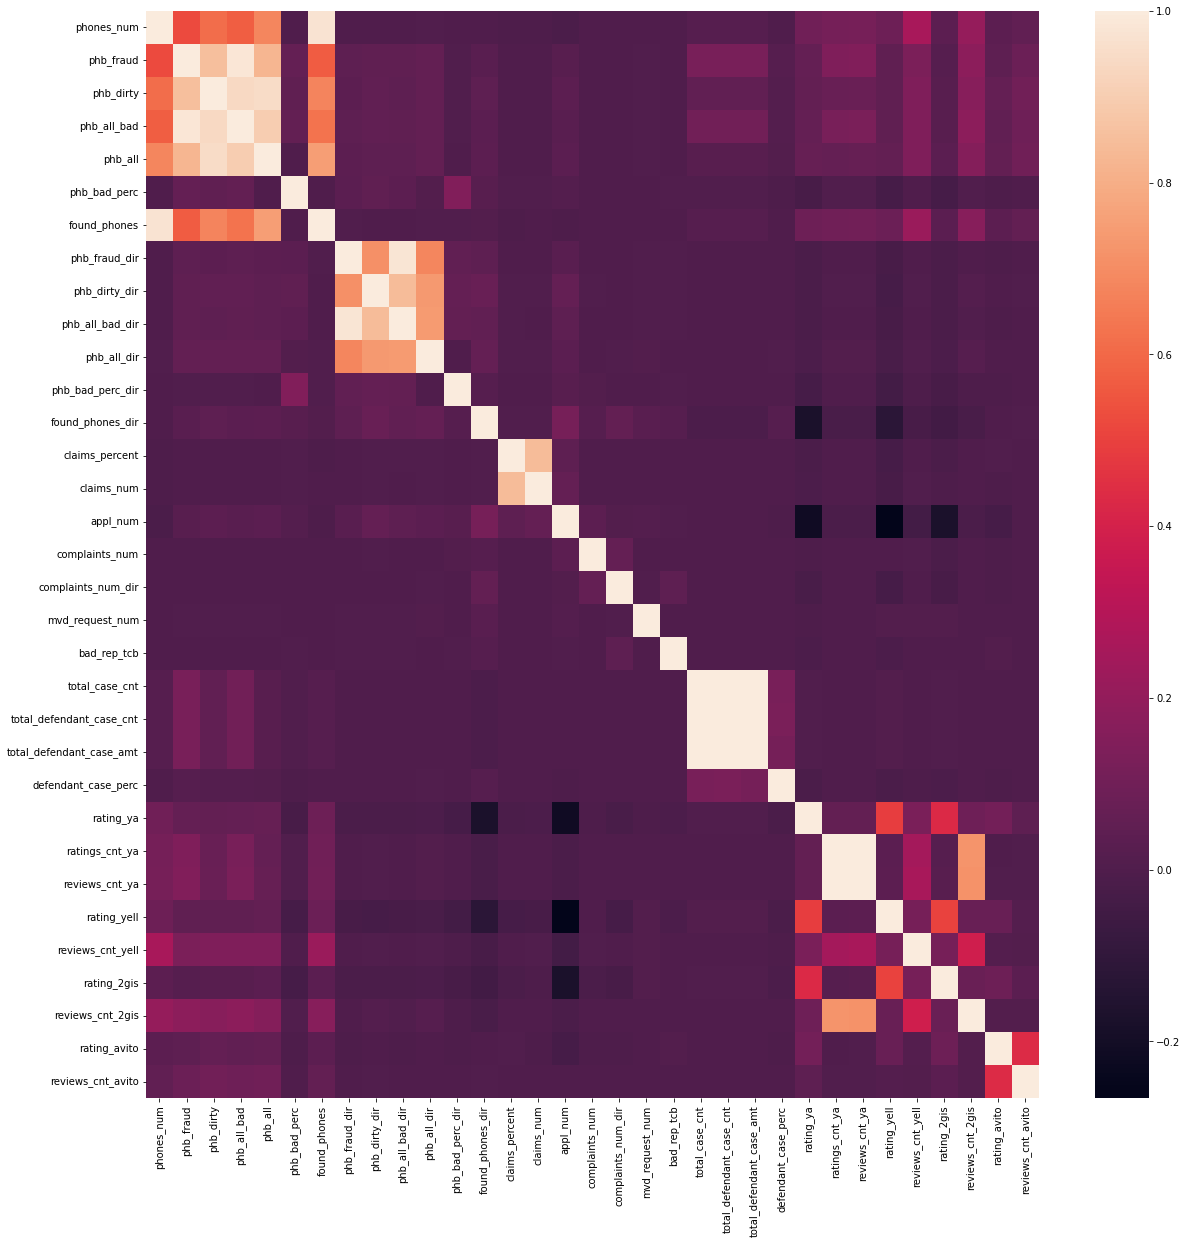

In [21]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr())
plt.savefig("corr.png")

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        15000 non-null  object 
 1   date                      15000 non-null  object 
 2   phones_num                15000 non-null  int64  
 3   phb_fraud                 15000 non-null  float64
 4   phb_dirty                 15000 non-null  float64
 5   phb_all_bad               15000 non-null  float64
 6   phb_all                   15000 non-null  float64
 7   phb_bad_perc              15000 non-null  float64
 8   found_phones              15000 non-null  float64
 9   phb_fraud_dir             15000 non-null  float64
 10  phb_dirty_dir             15000 non-null  float64
 11  phb_all_bad_dir           15000 non-null  float64
 12  phb_all_dir               15000 non-null  float64
 13  phb_bad_perc_dir          15000 non-null  float64
 14  found_

In [23]:
data.date = pd.to_datetime(data.date)

In [24]:
to_int_columns = [
    "appl_num",
    "bad_rep_tcb",
    "claims_num",
    "complaints_num",
    "complaints_num_dir",
    "found_phones",
    "found_phones_dir",
    "mvd_request_num",
    "phb_all",
    "phb_all_bad",
    "phb_all_bad_dir",
    "phb_all_dir",
    "phb_dirty",
    "phb_dirty_dir",
    "phb_fraud",
    "phb_fraud_dir",
    "phones_num",
    "ratings_cnt_ya",
    "reviews_cnt_2gis",
    "reviews_cnt_avito",
    "reviews_cnt_ya",
    "reviews_cnt_yell",
    "total_case_cnt",
    "total_defendant_case_amt",
    "total_defendant_case_cnt"
]

In [25]:
data.isna().sum()

id                          0
date                        0
phones_num                  0
phb_fraud                   0
phb_dirty                   0
phb_all_bad                 0
phb_all                     0
phb_bad_perc                0
found_phones                0
phb_fraud_dir               0
phb_dirty_dir               0
phb_all_bad_dir             0
phb_all_dir                 0
phb_bad_perc_dir            0
found_phones_dir            0
claims_percent              0
claims_num                  0
appl_num                    0
complaints_num              0
complaints_num_dir          0
mvd_request_num             0
bad_rep_tcb                 0
total_case_cnt              0
total_defendant_case_cnt    0
total_defendant_case_amt    0
defendant_case_perc         0
rating_ya                   0
ratings_cnt_ya              0
reviews_cnt_ya              0
rating_yell                 0
reviews_cnt_yell            0
rating_2gis                 0
reviews_cnt_2gis            0
rating_avi

In [26]:
data[to_int_columns] = data[to_int_columns].astype(int)

In [27]:
data.id.nunique()

14787

In [28]:
data.duplicated().sum()

0

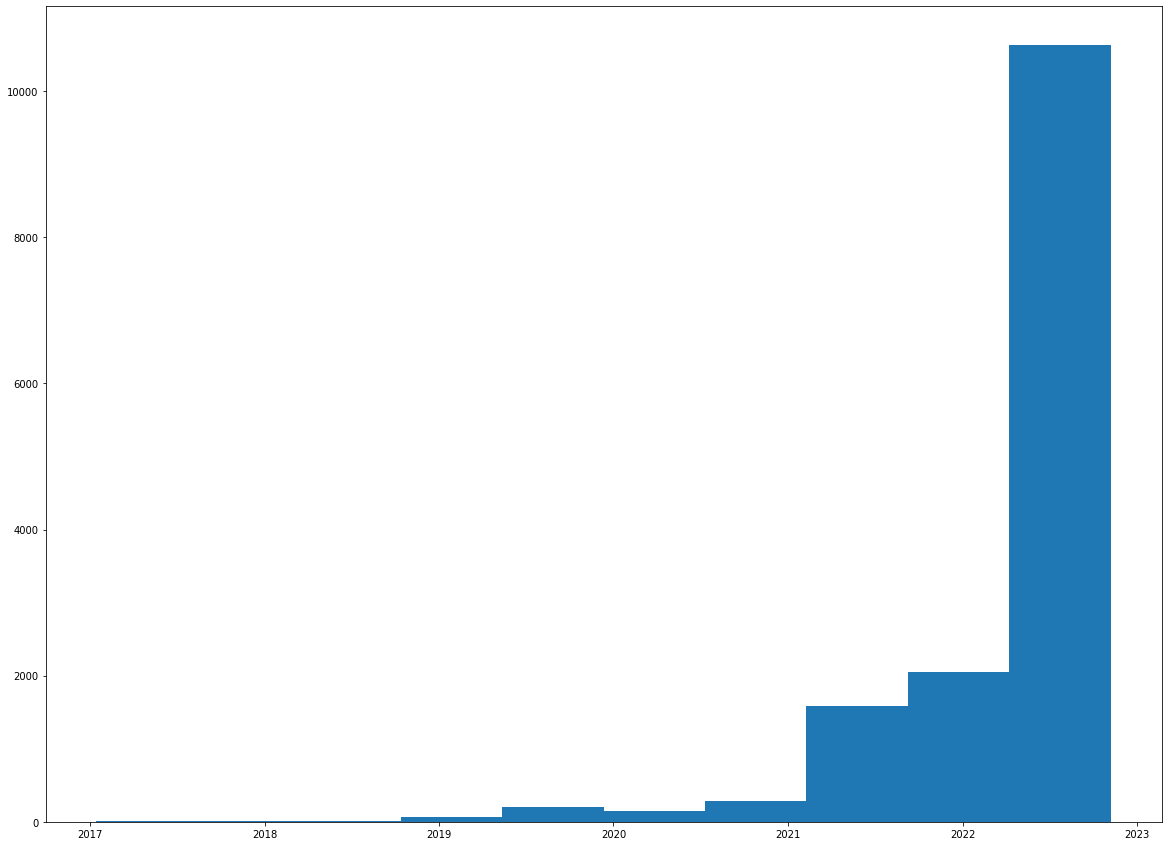

In [29]:
plt.figure(figsize=(20, 15))
plt.hist(data.date)
plt.show()

In [30]:
rating_columns = [
    "rating_ya",
    "rating_yell",
    "rating_avito",
    "rating_2gis",
    "ratings_cnt_ya"
]

In [31]:
data.loc[
    (data.rating_ya != 0) |
    (data.rating_yell != 0) |
    (data.rating_avito != 0) |
    (data.rating_2gis != 0) |
    (data.ratings_cnt_ya != 0)
].shape

(15000, 35)

In [32]:
per(6394)

42.626666666666665

In [33]:
data.loc[
    (data.rating_ya != 0) &
    (data.rating_yell != 0) &
    (data.rating_avito != 0) &
    (data.rating_2gis != 0) &
    (data.ratings_cnt_ya != 0)
    ].shape

(9924, 35)

In [34]:
per(75)

0.5

In [35]:
data.loc[
    (data.rating_ya != 0) &
    (data.rating_yell != 0) &
    (data.rating_avito != 0) &
    (data.rating_2gis != 0) &
    (data.ratings_cnt_ya != 0)
    ].phones_num.mean()

14.998790810157194

In [36]:
rating_columns

['rating_ya', 'rating_yell', 'rating_avito', 'rating_2gis', 'ratings_cnt_ya']

In [37]:
data.loc[data.rating_yell != 0].rating_yell.mean()

0.9665533070090362

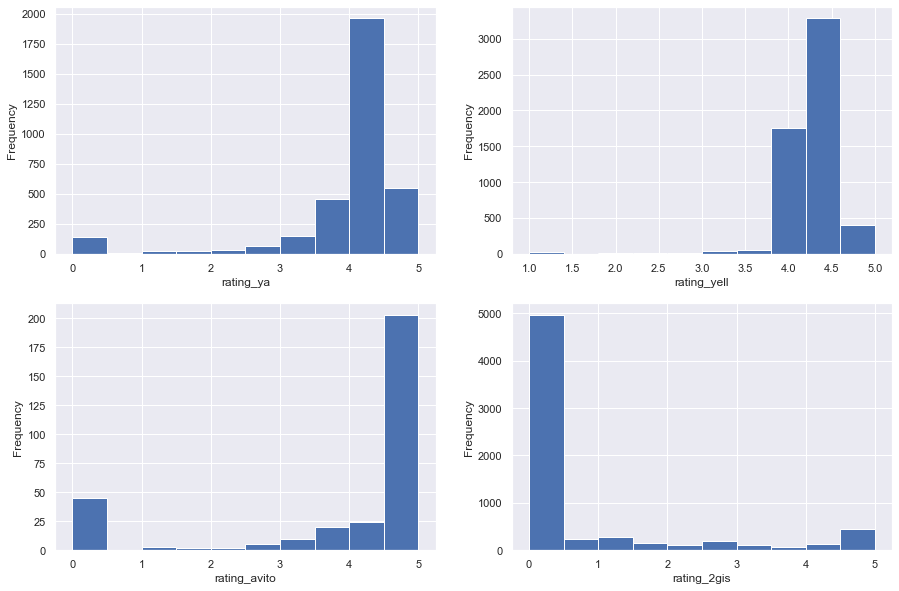

In [96]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = ax.flatten()
k = 0
for i in rating_columns[:-1]:
    # ax[k].set_title(i)
    ax[k].set_xlabel(i)
    data.loc[data[i] != -1][i].plot(kind="hist", ax=ax[k])
    k += 1

In [85]:
data.loc[data.rating_2gis != -1].rating_2gis.mean()

0.7330523769195867

In [86]:
data.loc[data.rating_2gis != -1].rating_2gis.min()

0.0

In [82]:
data.loc[data.rating_ya != -1].rating_ya.mean()

3.9337455830388692

In [83]:
data.loc[data.rating_avito != -1].rating_avito.mean()

3.920486553432413

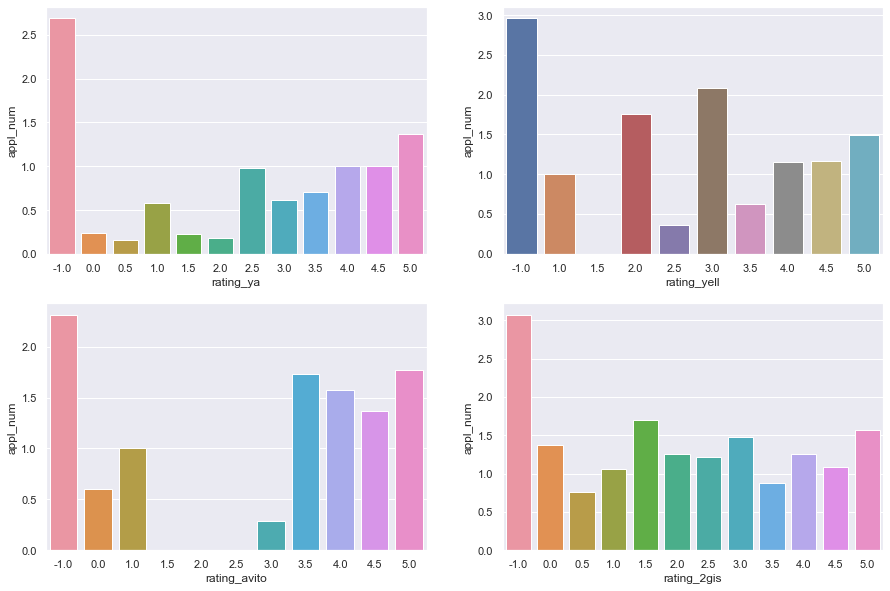

In [94]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = ax.flatten()
k = 0
for i in rating_columns[:-1]:
    # ax[k].set_title(i)
    data_rating = data.copy()
    data_rating[i] = data_rating[i].apply(lambda x: round(x * 2) / 2)
    sns.barplot(
        ax=ax[k],
        x=data_rating.groupby(i).mean().index,
        y=data_rating.groupby(i).mean().appl_num
    )
    k += 1